# MAJOR PROJECT 1

In [ ]:
Diagnosis - KNN Classifier

In [1]:


import pandas as pd 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

In [9]:
df=pd.read_csv('C:\\Users\\moham\\OneDrive\\Desktop\\Documents\\KNNAlgorithmDataset.csv')

In [10]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
print(df.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [13]:
# Strip any whitespace from column names
df.columns = df.columns.str.strip()

# Safely drop the 'Unnamed: 32' column if it exists
df = df.drop('Unnamed: 32', axis=1, errors='ignore')

# Safely drop the 'id' column if it exists
df = df.drop('id', axis=1, errors='ignore')

# Display the first five rows of the DataFrame
df.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [15]:
unique_classes = df['diagnosis'].unique()
print(f"Unique classes in 'diagnosis': {unique_classes}")

Unique classes in 'diagnosis': ['M' 'B']


In [16]:
df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0})
print(df.head())

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          

In [17]:
# Preparing feature set
X = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
Y = df[['diagnosis']]
print(X[0:5])
print(Y[0:5])

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           

In [18]:
print(df.describe())

        diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720       

In [19]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
# Preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
         2.83303087e+00,  2.48757756e+00, -2.14001647e-01,
         1.31686157e+00,  7.24026158e-01,  6.60819941e-01,
         1.14875667e+00,  9.07083081e-01,  1.88668963e+00,
        -1.35929347e+00,  2.30360062e+00,  2.00123749e+00,
         1.30768627e+00,  2.61666502e+00,  2.10952635e+00,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         2.63326966e-01,  7.42401948e-01, -6.05350847e-01,
        -6.92926270e-01, -4.40780058e-01,  2.60162067e-01,
        -8.05450380e-01, -9.94437403e-02,  1.80592744e+

C:\Users\moham\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


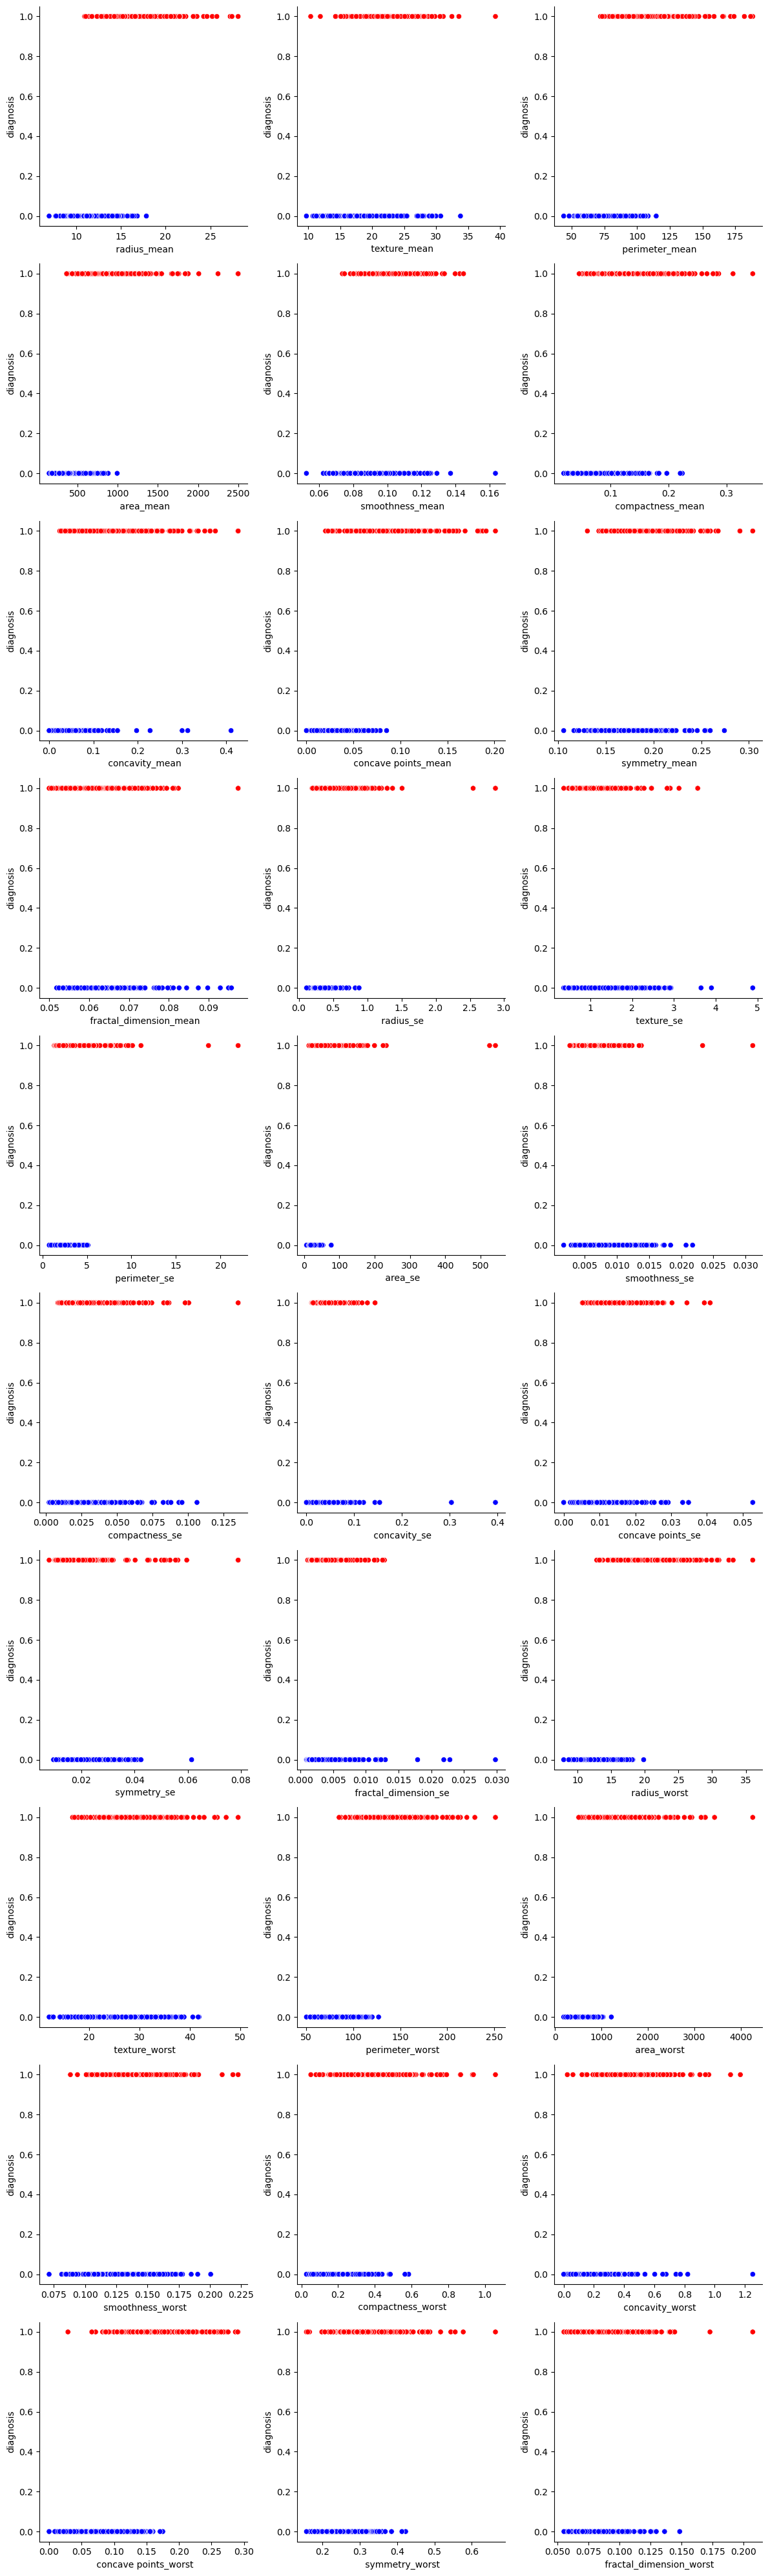

In [20]:
import seaborn as sns
# Viz.
x_cols = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
          'smoothness_mean', 'compactness_mean', 'concavity_mean', 
          'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 
          'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 
          'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 
          'fractal_dimension_se', 'radius_worst', 'texture_worst', 
          'perimeter_worst', 'area_worst', 'smoothness_worst', 
          'compactness_worst', 'concavity_worst', 'concave points_worst', 
          'symmetry_worst', 'fractal_dimension_worst']

melted_df = df.melt(id_vars="diagnosis", value_vars=x_cols)

g = sns.FacetGrid(melted_df, col="variable", col_wrap=3, sharex=False, sharey=False, height=4)

def scatter_with_hue(data, **kws):
    sns.scatterplot(data=data, x="value", y="diagnosis", hue="diagnosis", palette={0: "blue", 1: "red"}, legend=False, **kws)

g.map_dataframe(scatter_with_hue)


for ax in g.axes.flat:
    xlabel = ax.get_title().split('=')[1]  
    ax.set_xlabel(xlabel)
    ax.set_title('') 

plt.subplots_adjust(hspace=0.8) 

g.tight_layout()
plt.show()


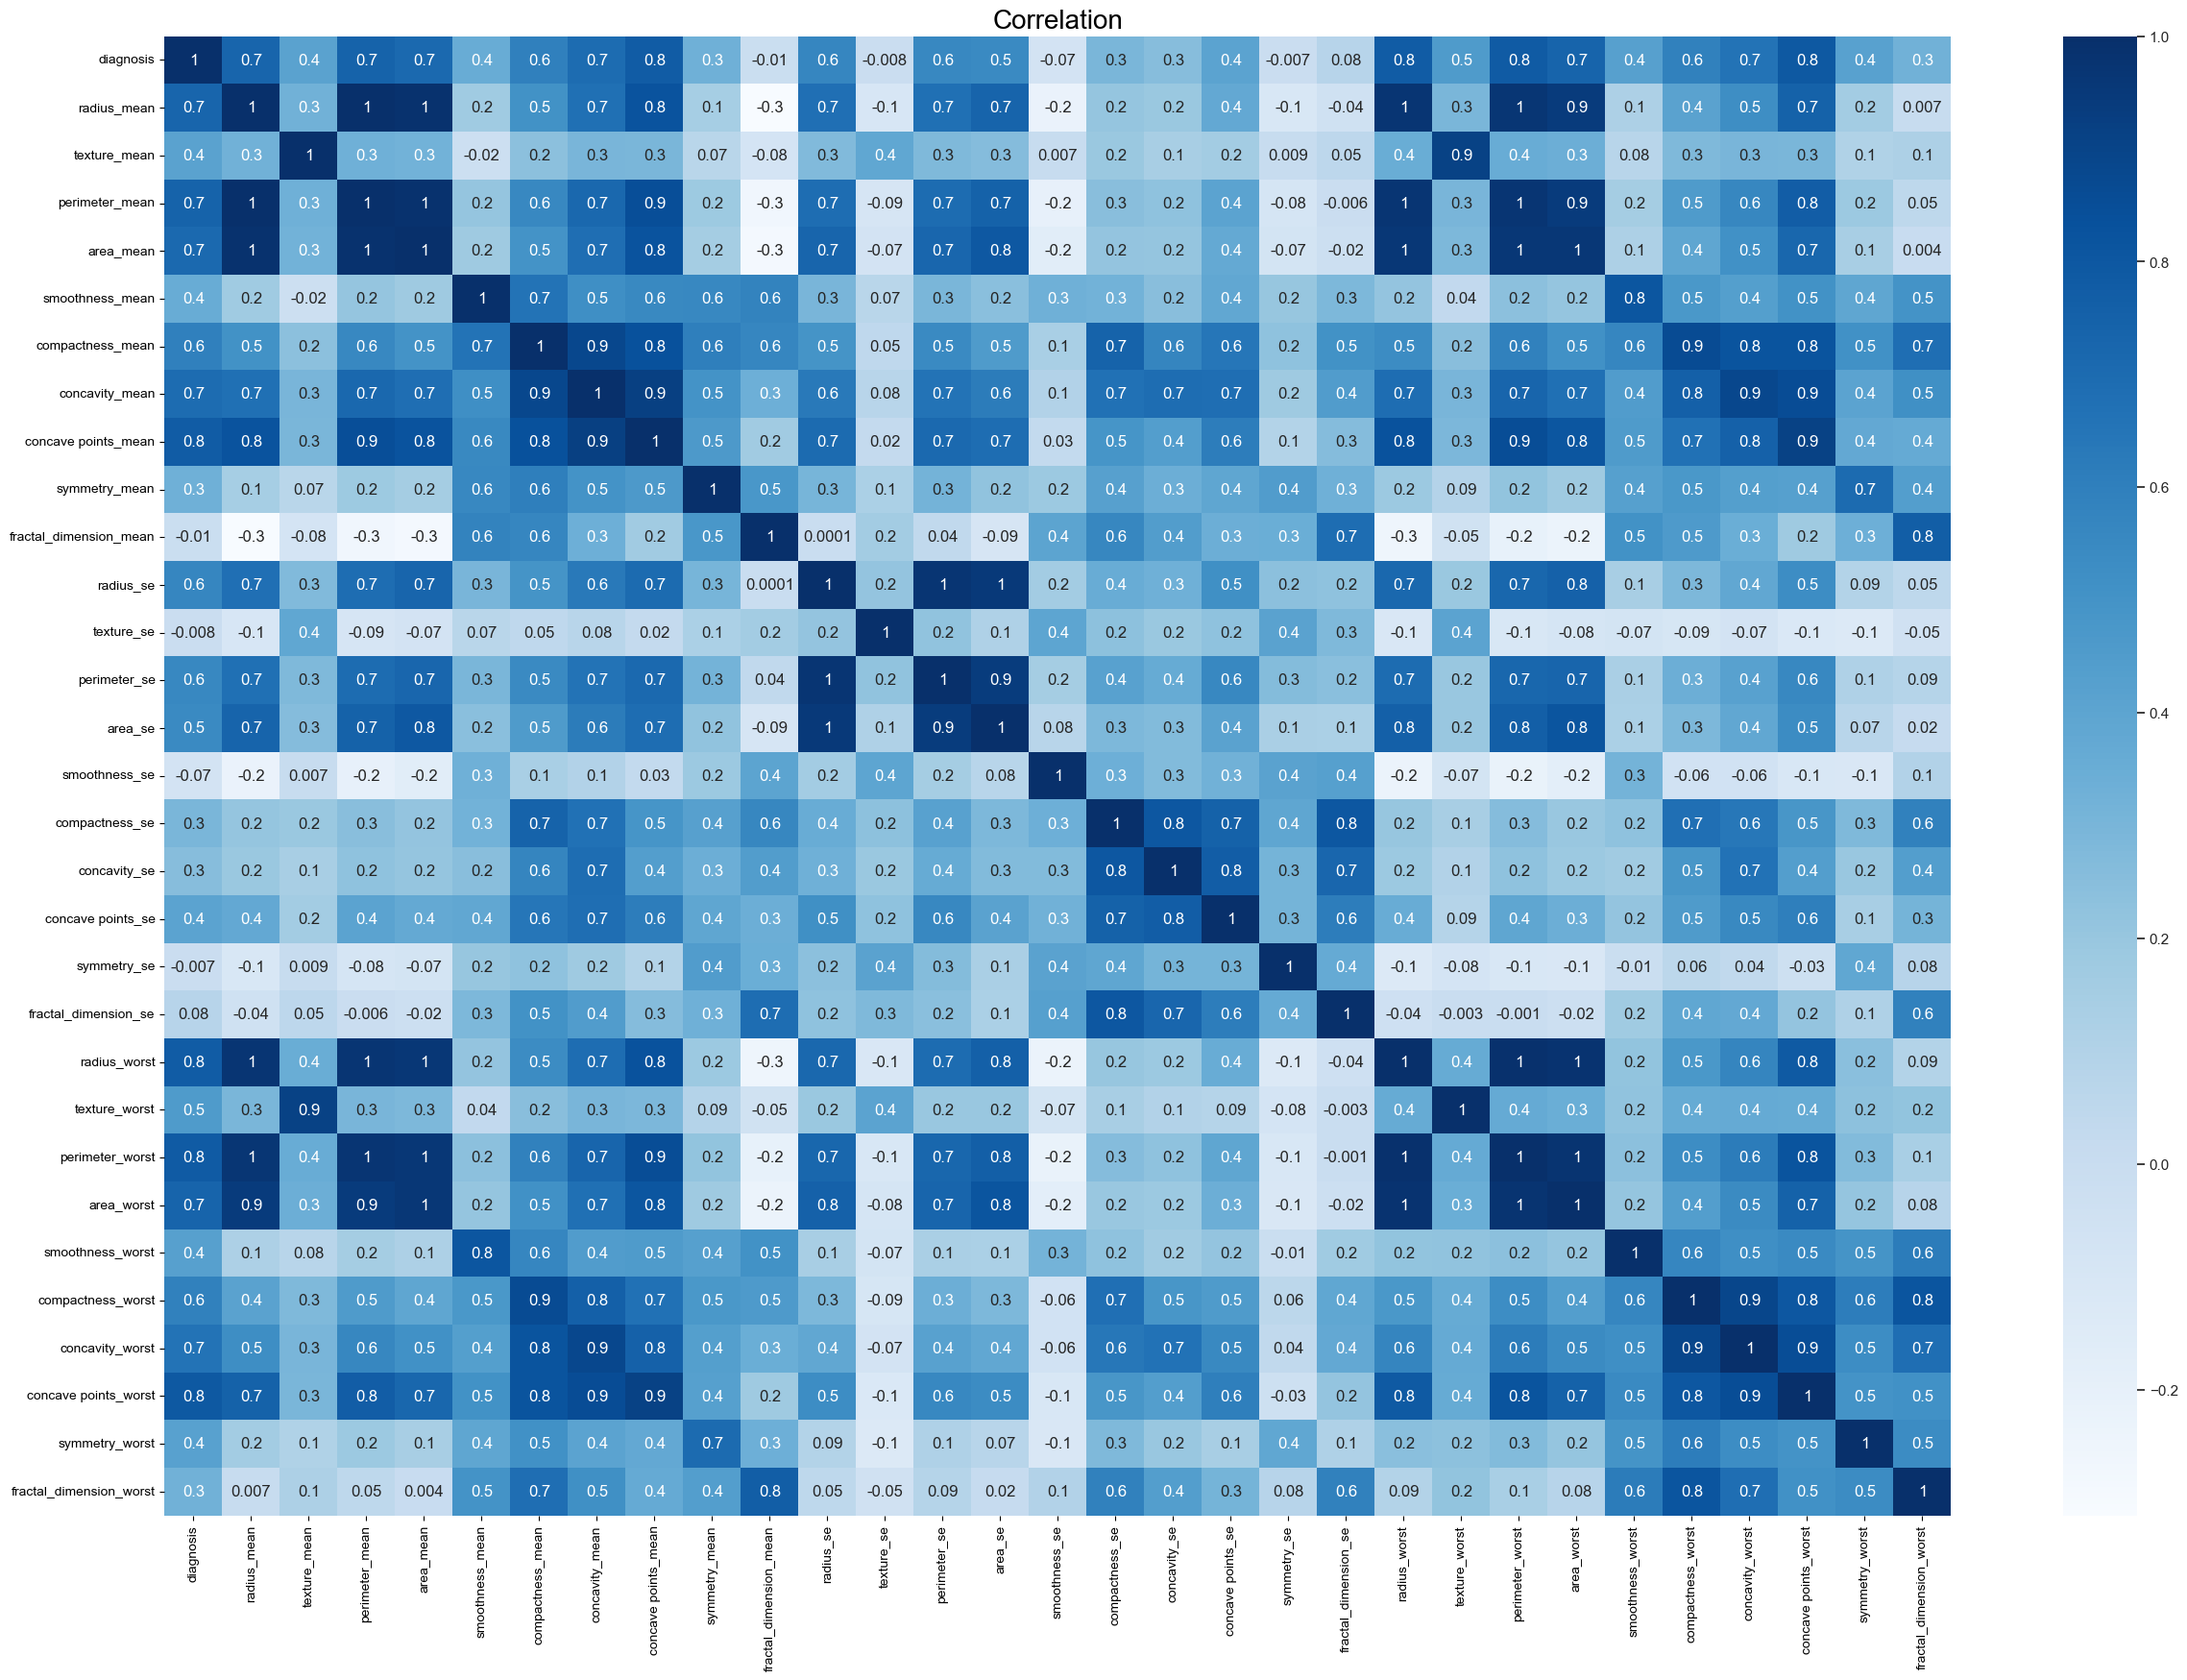

In [21]:
plt.figure(figsize=(30,20))
plt.title("Correlation", fontsize=20)
sns.set_theme(style="white")
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (455, 30) (455, 1)
Test set: (114, 30) (114, 1)


In [25]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 100
mean_acc = np.zeros((Ks-1))

for n in range(1, Ks):
    # Train the model and predict
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train.values.ravel())
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

# Display the mean accuracy scores for different values of K
mean_acc


array([0.94736842, 0.97368421, 0.98245614, 0.98245614, 0.96491228,
       0.97368421, 0.95614035, 0.96491228, 0.97368421, 0.98245614,
       0.98245614, 0.98245614, 0.98245614, 0.98245614, 0.99122807,
       0.99122807, 0.99122807, 0.98245614, 0.98245614, 0.98245614,
       0.98245614, 0.98245614, 0.98245614, 0.98245614, 0.98245614,
       0.98245614, 0.98245614, 0.98245614, 0.98245614, 0.98245614,
       0.97368421, 0.97368421, 0.97368421, 0.97368421, 0.96491228,
       0.96491228, 0.96491228, 0.96491228, 0.97368421, 0.97368421,
       0.97368421, 0.97368421, 0.97368421, 0.98245614, 0.97368421,
       0.97368421, 0.97368421, 0.96491228, 0.97368421, 0.97368421,
       0.97368421, 0.97368421, 0.96491228, 0.96491228, 0.96491228,
       0.96491228, 0.96491228, 0.96491228, 0.96491228, 0.96491228,
       0.96491228, 0.96491228, 0.96491228, 0.96491228, 0.96491228,
       0.96491228, 0.96491228, 0.96491228, 0.96491228, 0.96491228,
       0.96491228, 0.97368421, 0.96491228, 0.97368421, 0.96491

In [26]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.9912280701754386 with k= 15


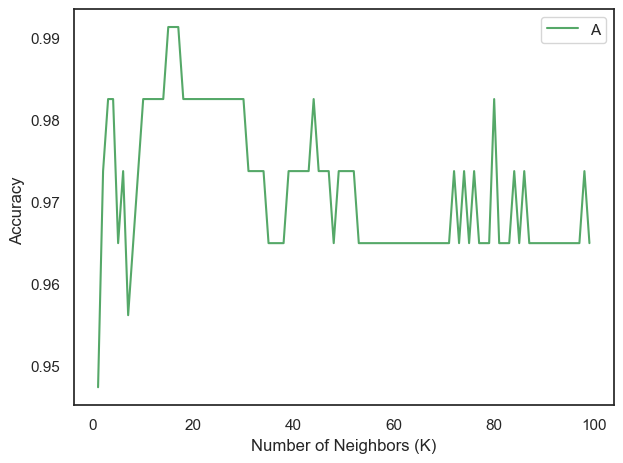

In [27]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.legend(('Accuracy '))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()


In [28]:
final_k = 15
neigh = KNeighborsClassifier(n_neighbors = final_k).fit(X_train,y_train.values.ravel())
yhat=neigh.predict(X_test)

In [29]:
jaccard_score = metrics.jaccard_score(y_test, yhat)
f1_score = metrics.f1_score(y_test, yhat)
print(f"Jaccard score: {jaccard_score}\nF1_Score: {f1_score}")

Jaccard score: 0.9705882352941176
F1_Score: 0.9850746268656716


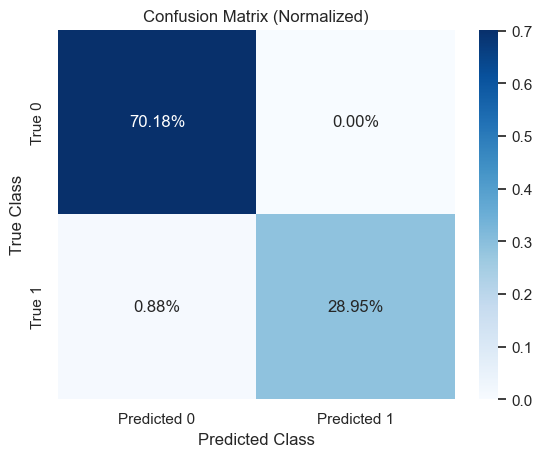

In [30]:
cf_matrix = metrics.confusion_matrix(y_test, yhat)

normalized_cf_matrix = cf_matrix / np.sum(cf_matrix)

sns.heatmap(normalized_cf_matrix, annot=True, fmt='.2%', cmap='Blues',
            xticklabels=['Predicted ' + str(label) for label in np.unique(yhat)],
            yticklabels=['True ' + str(label) for label in np.unique(y_test)])

plt.xlabel('Predicted Class')
plt.ylabel('True Class')

plt.title('Confusion Matrix (Normalized)')  
plt.show()